In [163]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px

In [164]:
df = pd.read_csv("vaccinetweets.csv", quotechar='"', delimiter=',').dropna()
df

id          user_name                user_location  \
0       1340539111971516416         Rachel Roh    La Crescenta-Montrose, CA   
2       1337858199140118533           eli🇱🇹🇪🇺👌                     Your Bed   
6       1337851215875608579  Gunther Fehlinger  Austria, Ukraine and Kosovo   
9       1337842295857623042       Ch.Amjad Ali                    Islamabad   
10      1337841934170255365        Tamer Yazar                Turkey-Israel   
...                     ...                ...                          ...   
158968  1421026517438631936        Luca Alagna       EU 🇪🇺 - BRU 🇧🇪 - RM 🇮🇹   
158969  1421025377908973571             VaxBLR             Bengaluru, India   
158970  1421025331750703105             VaxBLR             Bengaluru, India   
158971  1421023218458980353   Asianet Newsable             Bengaluru, India   
158972  1421017780879388673             VaxBLR             Bengaluru, India   

                                                                                                                                                        user_description  \
0                                                       Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻   
2                                                                                                                                                         heil, hydra 🖐☺   
6       End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped   
9                                            #ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad   
10         Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram :  tamervisits -   
...                                                                                                                                                                  ...   
158968                    Making things happen with my laptop sitting in my pajamas before my first cup of Earl Grey ☕\n🗯️Disinfo Analysis\n🌐StratCom\n🗳️Politics & Tech   
158969                                                        Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL   
158970                                                        Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL   
158971            Latest news, videos from India & around the world. Part of Asianet News Network. Straight, Bold & Relentless. Follow us on FB: https://t.co/ZTOBVdEgze   
158972                                                        Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL   

               user_created  user_followers  user_friends  user_favourites  \
0       2009-04-08 17:52:46             405          1692             3247   
2       2020-06-25 23:30:28              10            88              155   
6       2013-06-10 17:49:22            2731          5001            69344   
9       2012-11-12 04:18:12             671          2368            20469   
10      2009-09-17 16:45:16            1302            78              339   
...                     ...             ...           ...              ...   
158968  2007-01-24 19:54:14           16171          6255            38716   
158969  2021-06-21 08:44:34              17             0                0   
158970  2021-06-21 08:44:34              17             0                0   
158971  2016-04-13 06:31:15           34057           865              100   
158972  2021-06-21 08:44:34              17             0                0   

        user_verified                 date  \
0               False  2020-

In [133]:
print(df.columns)
print(df.shape)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
(80418, 16)


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80418 entries, 0 to 158972
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                80418 non-null  int64 
 1   user_name         80418 non-null  object
 2   user_location     80418 non-null  object
 3   user_description  80418 non-null  object
 4   user_created      80418 non-null  object
 5   user_followers    80418 non-null  int64 
 6   user_friends      80418 non-null  int64 
 7   user_favourites   80418 non-null  int64 
 8   user_verified     80418 non-null  bool  
 9   date              80418 non-null  object
 10  text              80418 non-null  object
 11  hashtags          80418 non-null  object
 12  source            80418 non-null  object
 13  retweets          80418 non-null  int64 
 14  favorites         80418 non-null  int64 
 15  is_retweet        80418 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 9.4+ MB


In [135]:
df.drop(columns=['id'], inplace=True)

In [136]:
df = df.drop_duplicates('text')
print(df.shape)

(80306, 15)


In [137]:
# use regular expressions to strip each tweet of mentions, hashtags, retweet information, and links
def clean_tweet_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    return text

# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
df['text'].transform(clean_tweet_text)
df.head()

user_name                user_location  \
0          Rachel Roh    La Crescenta-Montrose, CA   
2            eli🇱🇹🇪🇺👌                     Your Bed   
6   Gunther Fehlinger  Austria, Ukraine and Kosovo   
9        Ch.Amjad Ali                    Islamabad   
10        Tamer Yazar                Turkey-Israel   

                                                                                                                                                    user_description  \
0                                                   Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻   
2                                                                                                                                                     heil, hydra 🖐☺   
6   End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped   
9                                        #ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad   
10     Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram :  tamervisits -   

           user_created  user_followers  user_friends  user_favourites  \
0   2009-04-08 17:52:46             405          1692             3247   
2   2020-06-25 23:30:28              10            88              155   
6   2013-06-10 17:49:22            2731          5001            69344   
9   2012-11-12 04:18:12             671          2368            20469   
10  2009-09-17 16:45:16            1302            78              339   

    user_verified                 date  \
0           False  2020-12-20 06:06:44   
2           False  2020-12-12 20:33:45   
6           False  2020-12-12 20:06:00   
9           False  2020-12-12 19:30:33   
10          False  2020-12-12 19:29:07   

                                                                                                                                              text  \
0                                                Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF   
2     #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P   
6      it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP   
9   #CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w   
10  while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP   

                                                                                   hashtags  \
0                                                                        ['PfizerBioNTech']   
2       ['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']   
6                                                                           ['vaccination']   
9   ['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']   
10                                                            ['PfizerBioNTech', 'Vaccine']   

                 source  retweets  favorites  is_retweet  
0   Twitter for Android         0          0       False  
2   Twitter for Android         0          0       False  
6       Twitter Web App         0          4       False  
9       Twitter Web App         0          0       False  
10      Twitter Web App         0          0       False

In [138]:
# we do not care about the exact time of each tweet, we just want the date
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

user_name                user_location  \
0          Rachel Roh    La Crescenta-Montrose, CA   
2            eli🇱🇹🇪🇺👌                     Your Bed   
6   Gunther Fehlinger  Austria, Ukraine and Kosovo   
9        Ch.Amjad Ali                    Islamabad   
10        Tamer Yazar                Turkey-Israel   

                                                                                                                                                    user_description  \
0                                                   Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻   
2                                                                                                                                                     heil, hydra 🖐☺   
6   End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped   
9                                        #ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad   
10     Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram :  tamervisits -   

           user_created  user_followers  user_friends  user_favourites  \
0   2009-04-08 17:52:46             405          1692             3247   
2   2020-06-25 23:30:28              10            88              155   
6   2013-06-10 17:49:22            2731          5001            69344   
9   2012-11-12 04:18:12             671          2368            20469   
10  2009-09-17 16:45:16            1302            78              339   

    user_verified        date  \
0           False  2020-12-20   
2           False  2020-12-12   
6           False  2020-12-12   
9           False  2020-12-12   
10          False  2020-12-12   

                                                                                                                                              text  \
0                                                Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF   
2     #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P   
6      it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP   
9   #CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w   
10  while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP   

                                                                                   hashtags  \
0                                                                        ['PfizerBioNTech']   
2       ['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']   
6                                                                           ['vaccination']   
9   ['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']   
10                                                            ['PfizerBioNTech', 'Vaccine']   

                 source  retweets  favorites  is_retweet  
0   Twitter for Android         0          0       False  
2   Twitter for Android         0          0       False  
6       Twitter Web App         0          4       False  
9       Twitter Web App         0          0       False  
10      Twitter Web App         0          0       False

In [139]:
df.describe()

user_followers   user_friends  user_favourites      retweets  \
count    8.030600e+04   80306.000000     8.030600e+04  80306.000000   
mean     1.697850e+05    1407.386609     1.576141e+04      3.736458   
std      1.140008e+06    6593.701009     4.421584e+04     62.520680   
min      0.000000e+00       0.000000     0.000000e+00      0.000000   
25%      1.530000e+02     151.000000     3.830000e+02      0.000000   
50%      7.280000e+02     436.000000     2.406000e+03      0.000000   
75%      3.771000e+03    1199.000000     1.169675e+04      1.000000   
max      1.596669e+07  516578.000000     1.214813e+06  11288.000000   

          favorites  
count  80306.000000  
mean      17.013859  
std      219.191255  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        4.000000  
max    25724.000000

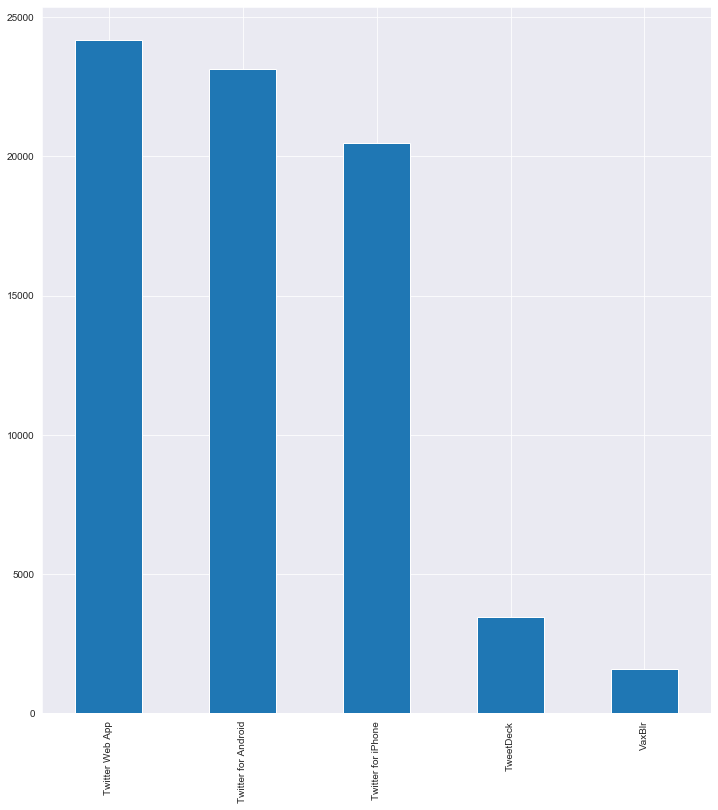

In [140]:
# which device are people tweeting about the vaccine from?
df['source'].value_counts().head(n=5).plot.bar()

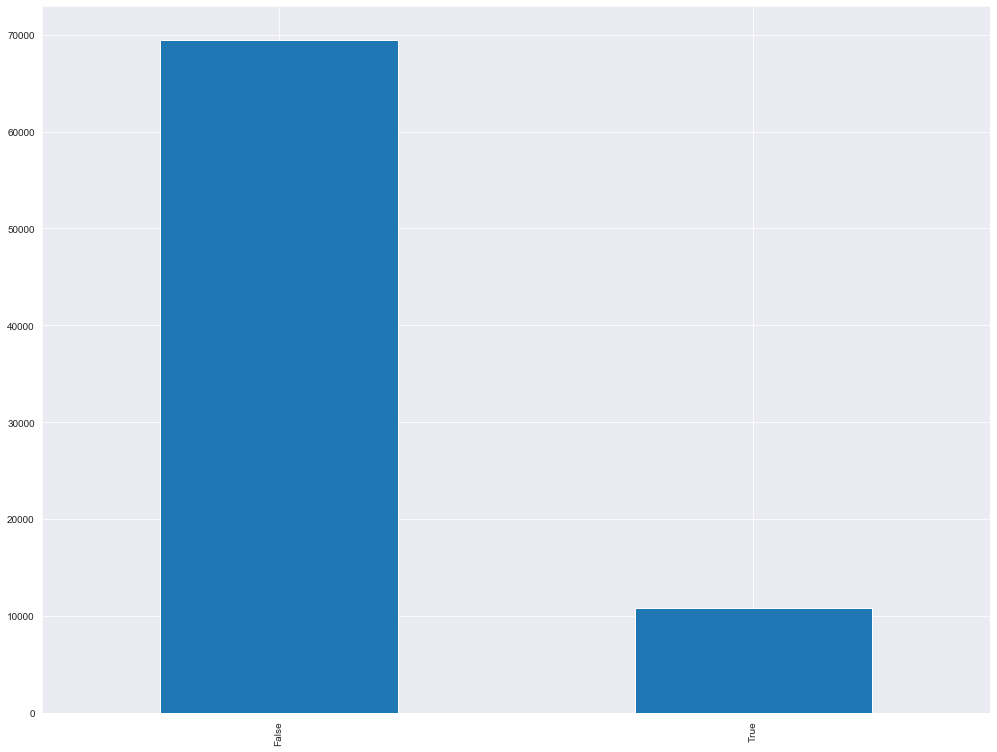

In [130]:
df['user_verified'].value_counts().head(n=10).plot.bar()

In [12]:
df[df['user_verified'] == True].head()

user_name    user_location  \
15         City A.M.  London, England   
17             ILKHA          Türkiye   
22         City A.M.  London, England   
43         City A.M.  London, England   
44  Daily News Egypt            Egypt   

                                     user_description         user_created  \
15  London's business newspaper - News, Opinion, a...  2009-06-09 13:53:06   
17     Official Twitter account of Ilke News Agency /  2015-05-22 08:31:12   
22  London's business newspaper - News, Opinion, a...  2009-06-09 13:53:06   
43  London's business newspaper - News, Opinion, a...  2009-06-09 13:53:06   
44  Egypt's Only Daily Independent Newspaper in En...  2009-04-26 07:56:24   

    user_followers  user_friends  user_favourites  user_verified        date  \
15           66224           603              771           True  2020-12-12   
17            4056             6                3           True  2020-12-12   
22           66224           603              771           True  2020-12-12   
43           66224           603              771           True  2020-12-12   
44          278080           116              765           True  2020-12-12   

                                                 text  \
15  Trump announces #vaccine rollout 'in less than...   
17  Coronavirus: Iran reports 8,201 new cases, 221...   
22  Trump announces #vaccine rollout 'in less than...   
43  Trump announces #vaccine rollout 'in less than...   
44  #FDA authorizes #PfizerBioNTech #coronavirus v...   

                                     hashtags              source  retweets  \
15                                ['vaccine']  Twitter for iPhone         0   
17  ['Iran', 'coronavirus', 'PfizerBioNTech']           TweetDeck         3   
22                                ['vaccine']              Buffer         1   
43                                ['vaccine']     Twitter Web App         0   
44   ['FDA', 'PfizerBioNTech', 'coronavirus']     Twitter Web App         1   

    favorites  is_retweet  
15          1       False  
17          5       False  
22          0       False  
43          2       False  
44          1       False

In [13]:
# what are the top 10 most retweeted tweets
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='retweets', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

text  \
68358        RDIF, Laboratorios Richmond launched production of #SputnikV in Argentina, the first country in Latin America to ma… https://t.co/oEMaUwVR92   
46053                  Why we need Two Doses of mRNA Vaccine 💉 #vaccines #COVID19 #Pfizer #moderna #VaccinesSaveLives #vaccinated https://t.co/RFRmPAyubD   
66822        ICMR study shows #COVAXIN neutralises against multiple variants of SARS-CoV-2 and effectively neutralises the doubl… https://t.co/0IYwr0KymJ   
76306  #Argentina's actor breaks into a live TV to show his #SputnikV vaccination certificate &amp; express his gratitude. \n\nT… https://t.co/N1NwjkD83y   
17118                                          Got my jab. For the curious, it was #Covaxin. \n\nFelt secure, will travel safely. https://t.co/8PL7PZMEsf   
53045            I see it’s going around with signature cropped....so here is the original:) #covid 19 #vaccine #pfizer #moderna… https://t.co/eoqT74V78A   
7126     New research published in Microbiology &amp; Infectious Diseases, immunologist J. Bart Classen warns #mRNA technology u… https://t.co/OWUTf5ShHO   
24268        #Covaxin 🇮🇳 , made by Hyderabad-based Bharat Biotech International Limited, has been declared "Safe, Immunogenic wi… https://t.co/FAUOEHJmAw   
32826        A batch of fake Sputnik V vaccines was confiscated in Mexico. See this comparison of the genuine #SputnikV with a f… https://t.co/J7PxMq2e1M   
17543        Prime Minister Narendra Modi choose early morning time to take #covaxin . No traffic was stopped . Traveled normall… https://t.co/udxAqk9xEC   

             date             user_name              user_location  \
68358  2021-04-20             Sputnik V            Moscow, Russia    
46053  2021-04-01        hotvickkrishna              Manhattan, NY   
66822  2021-04-21                  ICMR                  New Delhi   
76306  2021-05-19             Sputnik V            Moscow, Russia    
17118  2021-03-01     Dr. S. Jaishankar           New Delhi, India   
53045  2021-04-12             dawnymock  Fredericton New Brunswick   
7126   2021-02-10  Robert F. Kennedy Jr     Los Angles, California   
24268  2021-03-09        Megh Updates 🚨     Turn on Notification 🔔   
32826  2021-03-18             Sputnik V            Moscow, Russia    
17543  2021-03-01        Megh Updates 🚨     Turn on Notification 🔔   

                                                                              hashtags  \
68358                                                                     ['SputnikV']   
46053  ['vaccines', 'COVID19', 'Pfizer', 'moderna', 'VaccinesSaveLives', 'vaccinated']   
66822                                                                      ['COVAXIN']   
76306                                                        ['Argentina', 'SputnikV']   
17118                                                                      ['Covaxin']   
53045                                        ['covid', 'vaccine', 'pfizer', 'moderna']   
7126                                                                          ['mRNA']   
24268                                                                      ['Covaxin']   
32826                                                                     ['SputnikV']   
17543                                                                      ['covaxin']   

       favorites  retweets  
68358      25724     11288  
46053      19622      7695  
66822      11995      4851  
76306      14412      2550  
17118      22815      2360  
53045      10175      2299  
7126        3090      2247  
24268       9458      2095  
32826       3473      1980  
17543       8153      1980

In [17]:
 import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import string
import nltk
import sys
!{sys.executable} -m pip install plotly

!{sys.executable} -m pip install wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from nltk.util import ngrams
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import random
plt.rc('figure',figsize=(17,13))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/appy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
f_data = pd.read_csv('vaccinetweets.csv')
f_data.text =f_data.text.str.lower()

#Remove twitter handlers
f_data.text = f_data.text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
f_data.text = f_data.text.apply(lambda x:re.sub(r'\B#\S+','',x))


# Remove URLS
f_data.text = f_data.text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
f_data.text = f_data.text.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
f_data.text = f_data.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
f_data.text = f_data.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [19]:
sid = SIA()
f_data['sentiments']           = f_data['text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
f_data['Positive Sentiment']   = f_data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
f_data['Neutral Sentiment']    = f_data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
f_data['Negative Sentiment']   = f_data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

f_data.drop(columns=['sentiments'],inplace=True)

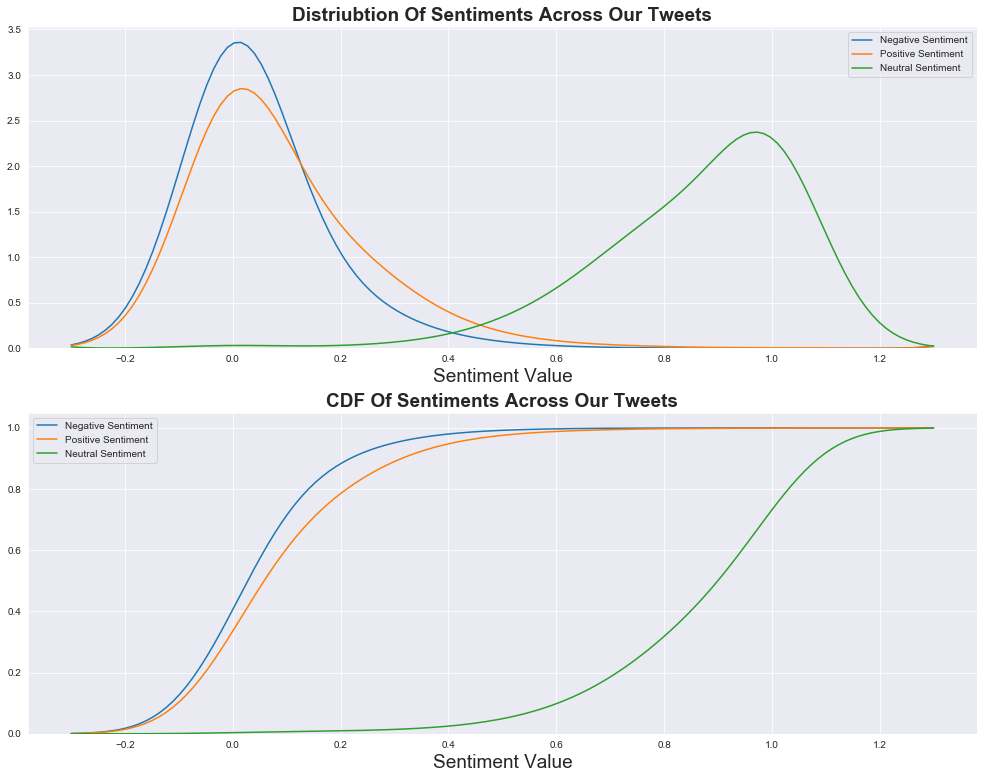

In [20]:
plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(f_data['Negative Sentiment'],bw=0.1)
sns.kdeplot(f_data['Positive Sentiment'],bw=0.1)
sns.kdeplot(f_data['Neutral Sentiment'],bw=0.1)
plt.xlabel('Sentiment Value',fontsize=19)
plt.subplot(2,1,2)
plt.title('CDF Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(f_data['Negative Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(f_data['Positive Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(f_data['Neutral Sentiment'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.show()

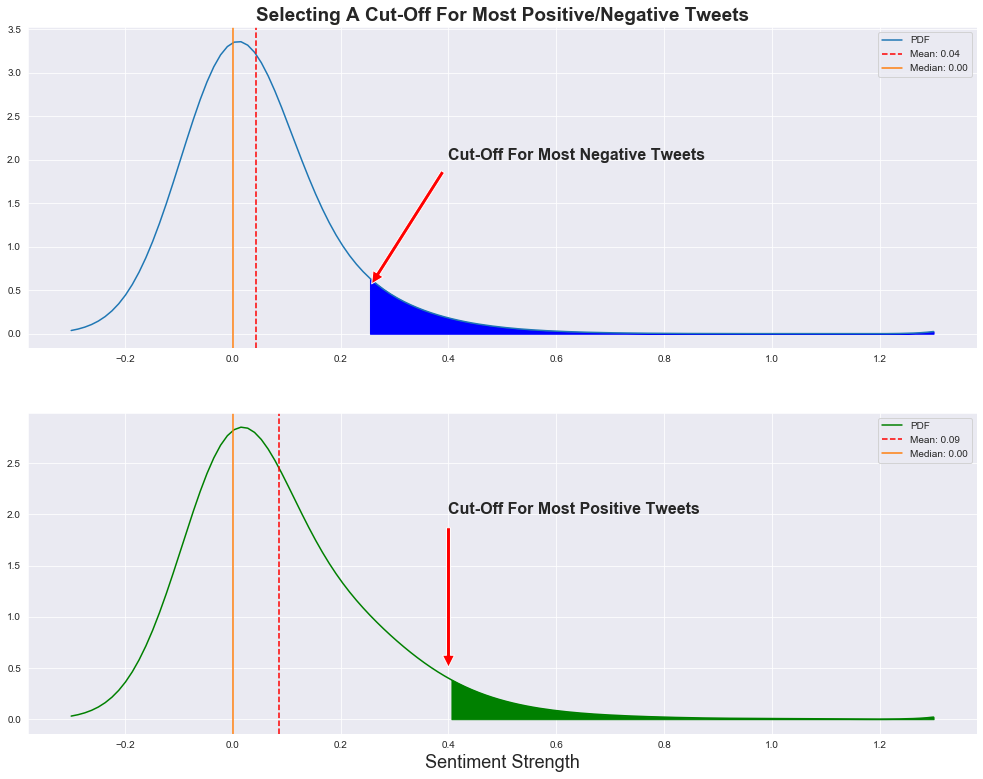

In [21]:
#Sorting And Feature Engineering
f_data = f_data.sort_values(by='date')
ft_data=f_data.copy()
ft_data['date'] = pd.to_datetime(f_data['date']).dt.date

ft_data['year']         = pd.DatetimeIndex(ft_data['date']).year
ft_data['month']        = pd.DatetimeIndex(ft_data['date']).month
ft_data['day']          = pd.DatetimeIndex(ft_data['date']).day
ft_data['day_of_year']  = pd.DatetimeIndex(ft_data['date']).dayofyear
ft_data['quarter']      = pd.DatetimeIndex(ft_data['date']).quarter
ft_data['season']       = ft_data.month%12 // 3 + 1

plt.subplot(2,1,1)
plt.title('Selecting A Cut-Off For Most Positive/Negative Tweets',fontsize=19,fontweight='bold')

ax0 = sns.kdeplot(f_data['Negative Sentiment'],bw=0.1)

kde_x, kde_y = ax0.lines[0].get_data()
ax0.fill_between(kde_x, kde_y, where=(kde_x>0.25) , 
                interpolate=True, color='b')

plt.annotate('Cut-Off For Most Negative Tweets', xy=(0.25, 0.5), xytext=(0.4, 2),
            arrowprops=dict(facecolor='red', shrink=0.05),fontsize=16,fontweight='bold')

ax0.axvline(f_data['Negative Sentiment'].mean(), color='r', linestyle='--')
ax0.axvline(f_data['Negative Sentiment'].median(), color='tab:orange', linestyle='-')
plt.legend({'PDF':f_data['Negative Sentiment'],r'Mean: {:.2f}'.format(f_data['Negative Sentiment'].mean()):f_data['Negative Sentiment'].mean(),
            r'Median: {:.2f}'.format(f_data['Negative Sentiment'].median()):f_data['Negative Sentiment'].median()})

plt.subplot(2,1,2)

ax1 = sns.kdeplot(f_data['Positive Sentiment'],bw=0.1,color='green')

plt.annotate('Cut-Off For Most Positive Tweets', xy=(0.4, 0.43), xytext=(0.4, 2),
            arrowprops=dict(facecolor='red', shrink=0.05),fontsize=16,fontweight='bold')
kde_x, kde_y = ax1.lines[0].get_data()
ax1.fill_between(kde_x, kde_y, where=(kde_x>0.4) , 
                interpolate=True, color='green')
ax1.set_xlabel('Sentiment Strength',fontsize=18)


ax1.axvline(f_data['Positive Sentiment'].mean(), color='r', linestyle='--')
ax1.axvline(f_data['Positive Sentiment'].median(), color='tab:orange', linestyle='-')
plt.legend({'PDF':f_data['Positive Sentiment'],r'Mean: {:.2f}'.format(f_data['Positive Sentiment'].mean()):f_data['Positive Sentiment'].mean(),
            r'Median: {:.2f}'.format(f_data['Positive Sentiment'].median()):f_data['Positive Sentiment'].median()})

plt.show()

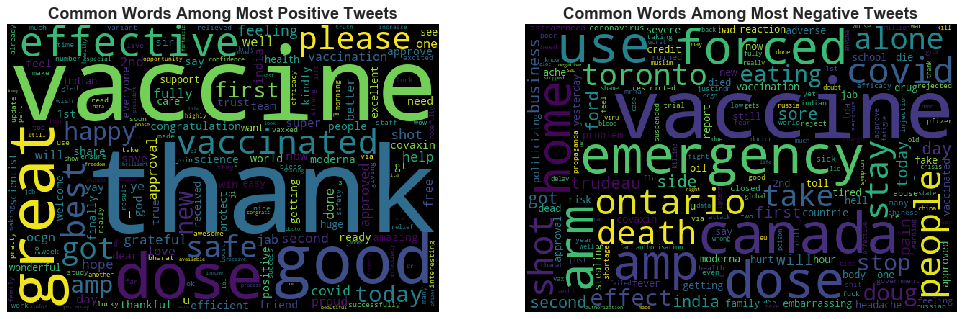

In [23]:
Most_Positive = f_data[f_data['Positive Sentiment'].between(0.4,1)]
Most_Negative = f_data[f_data['Negative Sentiment'].between(0.25,1)]

Most_Positive_text = ' '.join(Most_Positive.text)
Most_Negative_text = ' '.join(Most_Negative.text)


pwc = WordCloud(width=600,height=400,collocations = False).generate(Most_Positive_text)
nwc = WordCloud(width=600,height=400,collocations = False).generate(Most_Negative_text)

plt.subplot(1,2,1)
plt.title('Common Words Among Most Positive Tweets',fontsize=16,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Common Words Among Most Negative Tweets',fontsize=16,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

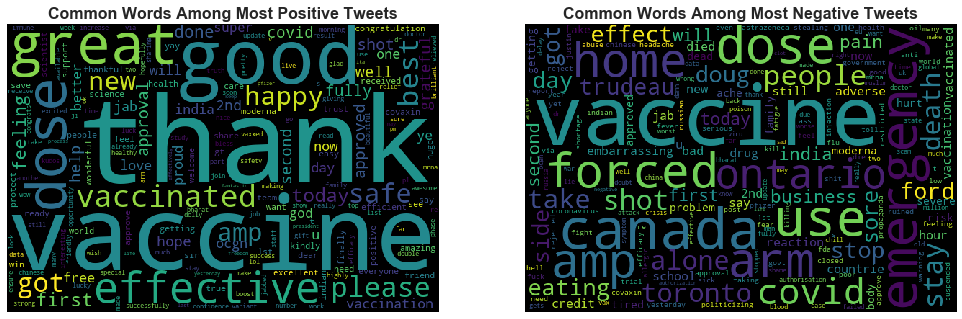

In [24]:
Most_Positive = f_data[f_data['Positive Sentiment'].between(0.4,1)]
Most_Negative = f_data[f_data['Negative Sentiment'].between(0.25,1)]

Most_Positive_text = ' '.join(Most_Positive.text)
Most_Negative_text = ' '.join(Most_Negative.text)


pwc = WordCloud(width=600,height=400,collocations = False).generate(Most_Positive_text)
nwc = WordCloud(width=600,height=400,collocations = False).generate(Most_Negative_text)

plt.subplot(1,2,1)
plt.title('Common Words Among Most Positive Tweets',fontsize=16,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Common Words Among Most Negative Tweets',fontsize=16,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

In [60]:
all_vax = ['covaxin', 'covishield','sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine-- not very helpful!
def filter_by_vaccy(df, vax):
    df_filt = pd.DataFrame()
    for v in vax:
        df_filt = df_filt.append(df[df['text'].str.lower().str.contains(v)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
#     df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date']).agg(np.nanmean).reset_index()
    timeline['count'] = df_filt.groupby(['date']).count().reset_index()['retweets']
    timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
    timeline["polarity"] = timeline["polarity"].astype(float)
    timeline["subjectivity"] = timeline["subjectivity"].astype(float)
    return df_filt, timeline

In [62]:
# Plot Wordcloud for Top-50 words
stopwords = set(STOPWORDS)
def display_wordcloud(df, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(df))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=1.3)

    plt.imshow(wordcloud)
    plt.show()

In [63]:
# Plot for Percentage of data from different locations
def data_source(feature, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

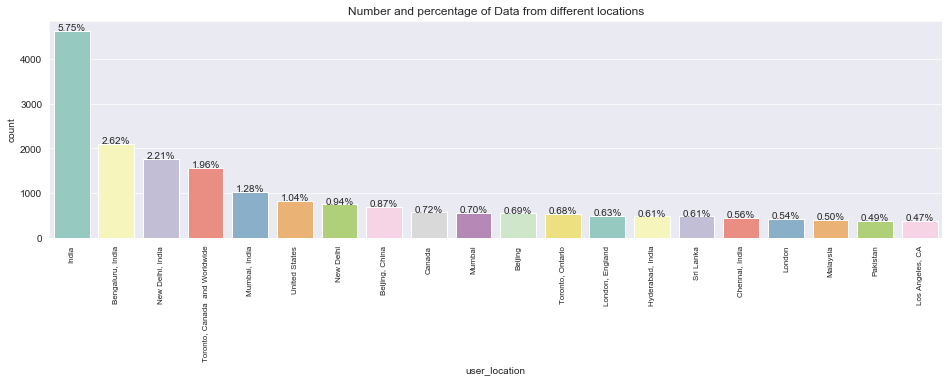

In [64]:
# Percentage of data from different locations
data_source("user_location", "Data from different locations", df, 4)


In [65]:
# Plot Frequency of User Names, Tweet Sources...
def plot_frequency_charts(df, feature, title):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

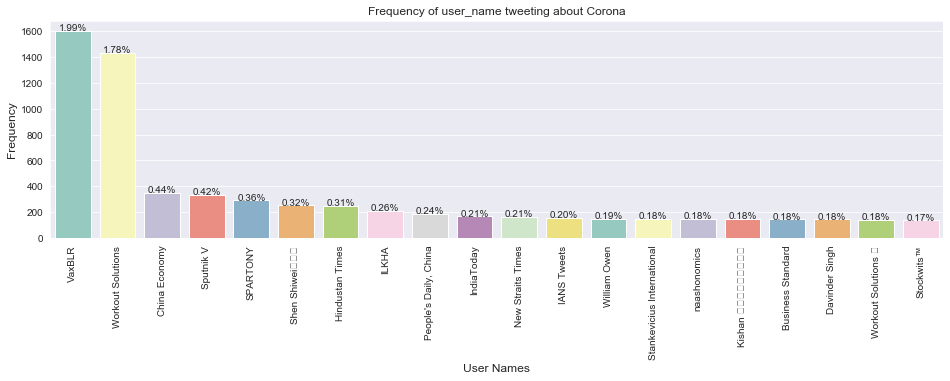

In [66]:
# Top 20 users based on frequency of tweets
plot_frequency_charts(df, 'user_name', 'User Names')

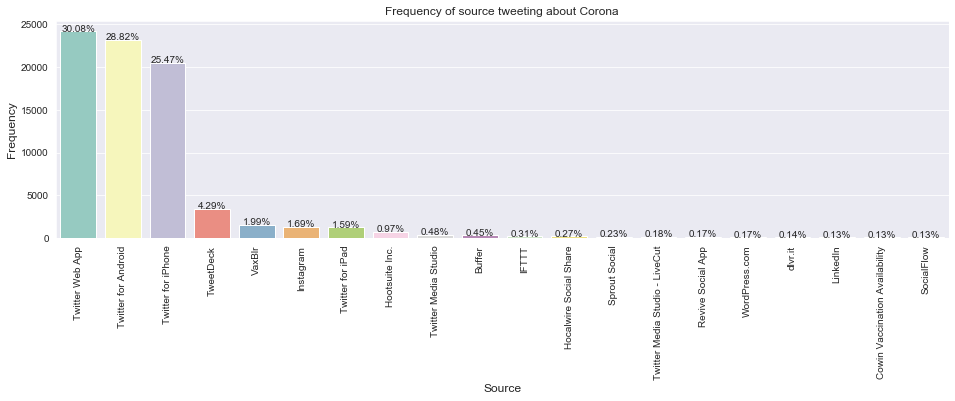

In [67]:
# Top 20 tweet sources based on frequency of tweets
plot_frequency_charts(df, 'source','Source')

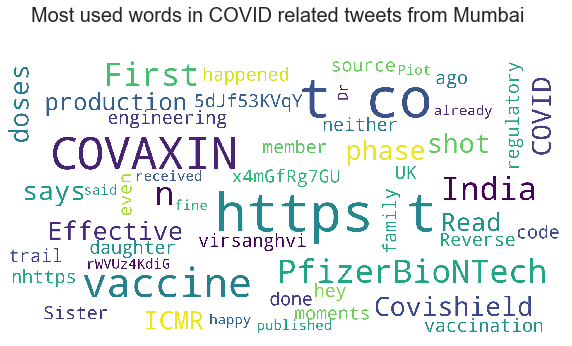

In [68]:
# WordCloud for top-50 words in tweets from Mumbai
bang_df1 = df.loc[df.user_location == "Mumbai"]
bang_df2 = df.loc[df.user_location == "Mumbai"]
dfs = [bang_df2, bang_df1]
bang_df = pd.concat(dfs, axis=0, join='inner', ignore_index=False, keys=None,
                    levels=None, names=None, verify_integrity=False, copy=True)
display_wordcloud(bang_df['text'], title = 'Most used words in COVID related tweets from Mumbai')

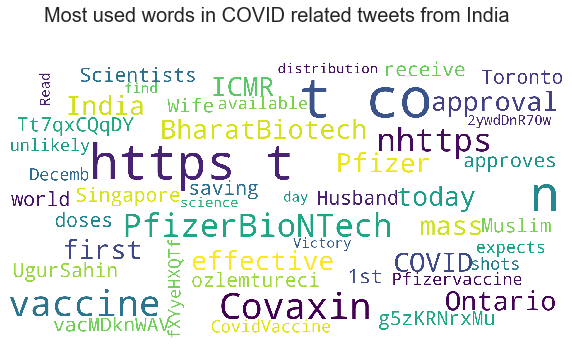

In [69]:
# WordCloud for top-50 words in tweets from India
india_df1 = df.loc[df.user_location=="India"]
india_df2 = df.loc[df.user_location=="New Delhi, India"]
india_df3 = df.loc[df.user_location=="Mumbai, India"]
india_df4 = df.loc[df.user_location=="New Delhi"]
dfs1 = [india_df1, india_df2, india_df3, india_df4]
india_df = pd.concat(dfs1, axis=0, join='inner', ignore_index=False, keys=None,
                    levels=None, names=None, verify_integrity=False, copy=True)
display_wordcloud(india_df['text'], title = 'Most used words in COVID related tweets from India')


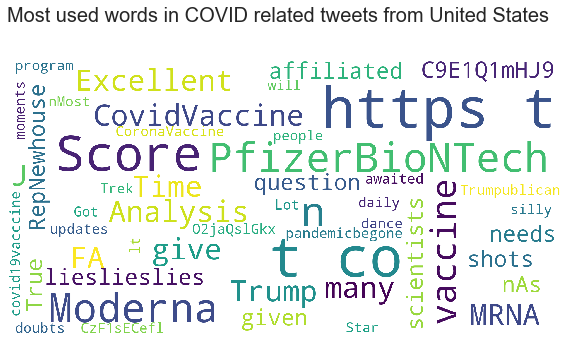

In [70]:
# WordCloud for top-50 words in tweets from United States of America
usa_df1 = df.loc[df.user_location=="United States"]
usa_df2 = df.loc[df.user_location=="Washington, DC"]
usa_df3 = df.loc[df.user_location=="New York, NY"]
usa_df4 = df.loc[df.user_location=="Los Angeles, CA"]
usa_df5 = df.loc[df.user_location=="USA"]
usa_df6 = df.loc[df.user_location=="California, USA"]
dfs2 = [usa_df1, usa_df2, usa_df3, usa_df4, usa_df5, usa_df6]
usa_df = pd.concat(dfs2, axis=0, join='inner', ignore_index=False, keys=None,
                    levels=None, names=None, verify_integrity=False, copy=True)
display_wordcloud(usa_df['text'], title = 'Most used words in COVID related tweets from United States')

In [89]:
cc_df, cc_timeline = filter_by_vaccy(df, ['covaxin', 'biontech'])
print(cc_df.shape)
fig = px.bar(cc_timeline, x='date', y='count', color='polarity')
fig.show()

(13515, 19)


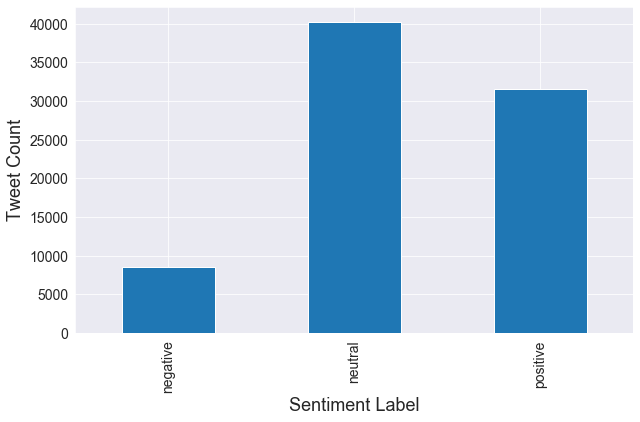

<Figure size 1224x936 with 0 Axes>

In [90]:
# polarity values ranging from -1 to 1 are really useful for sentiment analysis
# but let's convert our data to 3 classes (negative, neutral, and positive) so that we can visualize it
criteria = [df['polarity'].between(-1, -0.01), df['polarity'].between(-0.01, 0.01), df['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
df['sentiment'] = np.select(criteria, values, 0)

# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()


In [91]:
timeline = df.groupby(['date']).agg(np.nanmean).reset_index()
timeline['count'] = df.groupby(['date']).count().reset_index()['retweets']
timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
timeline["polarity"] = timeline["polarity"].astype(float)
timeline["subjectivity"] = timeline["subjectivity"].astype(float)
timeline

date  count  polarity  retweets  favorites  subjectivity
0    2020-12-12     38  0.034952  0.631579   2.868421      0.227801
1    2020-12-13     52  0.055937  1.942308   7.500000      0.255696
2    2020-12-14     83  0.116874  4.698795  29.204819      0.267803
3    2020-12-15     87  0.094041  1.022989   7.333333      0.258078
4    2020-12-16     78  0.104020  1.000000   5.115385      0.248872
..          ...    ...       ...       ...        ...           ...
209  2021-08-03    530  0.120739  2.552830   8.962264      0.322978
210  2021-08-04    442  0.117078  2.981900  12.468326      0.292484
211  2021-08-05    620  0.139381  5.208065  29.338710      0.304436
212  2021-08-06    478  0.117997  1.309623   4.951883      0.302151
213  2021-08-07    174  0.151374  0.649425   2.879310      0.310356

[214 rows x 6 columns]

In [92]:
df[df['date'].astype(str) == '2021-07-12'][['user_location', 'date', 'text', 'hashtags', 'polarity', 'subjectivity', 'sentiment']]

user_location        date  \
127851                        Colorado  2021-07-12   
127875                Toronto, Ontario  2021-07-12   
127891                           India  2021-07-12   
127905                            Moon  2021-07-12   
127918  Delhi-Gangolihaat-Haridwar-Chd  2021-07-12   
...                                ...         ...   
138447                Bengaluru, India  2021-07-12   
138448                Bengaluru, India  2021-07-12   
138450              Indonesia, Jakarta  2021-07-12   
138452                Bengaluru, India  2021-07-12   
138453                Bengaluru, India  2021-07-12   

                                                                                                                                                   text  \
127851                                        vaxx off!!! 🙌🏽💯🇺🇸#vaccination #COVID19 #COVAXIN #Olympics #olympian #USA #America https://t.co/9x8grCkfGf   
127875           @pfizer #covaxin is better.  You know if this... its why you are doing what you are doing #DeltaVariant #OCGN… https://t.co/mWkBja6fhA   
127891                                            Documents for #Covaxin nod submitted to WHO; decision soon: Bharat Biotech\n\nhttps://t.co/VntERV86IT   
127905                                               $OCGN @Ocugen @BharatBiotech #covaxin\nFinally making the news it deserves https://t.co/IrrQl5CDIJ   
127918                                                    Thanks to @NavroopSingh_ and his updates too... Was more convinced to take #COVAXIN jab..💉🇮🇳🙏   
...                                                                                                                                                 ...   
138447   45+ #BBMP #Bengaluru #CovidVaccine Availability for 12/07 at 07:30AM\nFREE Slots \n#COVISHIELD - Dose1:1419, Dose2:12… https://t.co/acaHAMjJ0a   
138448  45+ #URBAN #Bengaluru #CovidVaccine Availability for 12/07 at 07:30AM\nFREE Slots 0\nPAID Slots \n#COVISHIELD - Dose1:… https://t.co/rFcTeqHYM1   
138450   #SputnikV has a high tolerability profile in the population aged ≥60 years - @TheLancet \n\n@sputnikvaccine shows hig… https://t.co/BpDJo1xvIh   
138452  18-44 #BBMP #Bengaluru #CovidVaccine Availability for 12/07 at 07:00AM\nFREE Slots 0\nPAID Slots \n#COVISHIELD - Dose1… https://t.co/Kwf6DpTXCs   
138453    18-44 #URBAN #Bengaluru #CovidVaccine Availability for 12/07 at 07:00AM\nFREE Slots \n#COVISHIELD - Dose1:0, Dose2:1… https://t.co/vSQaoflqls   

                                                                               hashtags  \
127851  ['vaccination', 'COVID19', 'COVAXIN', 'Olympics', 'olympian', 'USA', 'America']   
127875                                              ['covaxin', 'DeltaVariant', 'OCGN']   
127891                                                                      ['Covaxin']   
127905                                                                      ['covaxin']   
127918                                                                      ['COVAXIN']   
...                                                                                 ...   
138447                              ['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']   
138448                             ['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']   
138450                                                                     ['SputnikV']   
138452                              ['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']   
138453                             ['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']   

        polarity  subjectivity sentiment  
127851      0.00          0.00   neutral  
127875      0.50          0.50  positive  
127891      0.00          0.00   neutral  
127905      0.00          1.00   neutral  
127918      0.35          0.35  positive  
...          ...           ...       ...  
138447      0.40          0.80  positive  
138448      0.20          0.40  positive  
138450      0.03          0.47  pos

In [93]:
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")

[nltk_data] Downloading package wordnet to /Users/appy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/appy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

# Reusable function to generate word clouds 
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))
    
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
#     plt.show();
    return fig

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list 
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    # print(top_n_words)
    return top_n_words
    
def clean_document(doc):
    spell = SpellChecker()
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize words (needed for calculating frequencies correctly )
    doc = [lemmatizer.lemmatize(x) for x in doc]
    
    # Get the top 10% of all words. This may include "misspelled" words 
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words 
    misspelled = spell.unknown(doc)
    
    # Accept the correctly spelled words and top_n words 
    clean_words = [x for x in doc if x not in misspelled or x in top_n_words]
    
    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])
    
    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    clean_words.extend(spell.known(split_words))
    
    return clean_words

def get_log_likelihood(doc1, doc2):    
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }
    
    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }
    
    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }
    
    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words 
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud

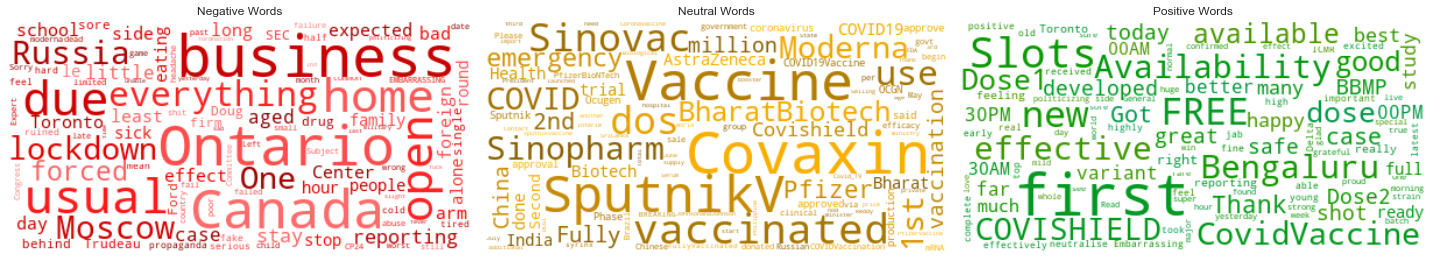

In [95]:
def get_smart_clouds(df):

    neg_doc = flatten_list(df[df['sentiment']=='negative']['words'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(df[df['sentiment']=='positive']['words'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(df[df['sentiment']=='neutral']['words'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = clean_document(neg_doc)
    neu_doc_clean = clean_document(neu_doc)
    pos_doc_clean = clean_document(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values 
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    fig = generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    return fig

# Convert string to a list of words
wordcloud_df = df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("sentiment_wordclouds.png", bbox_inches="tight")

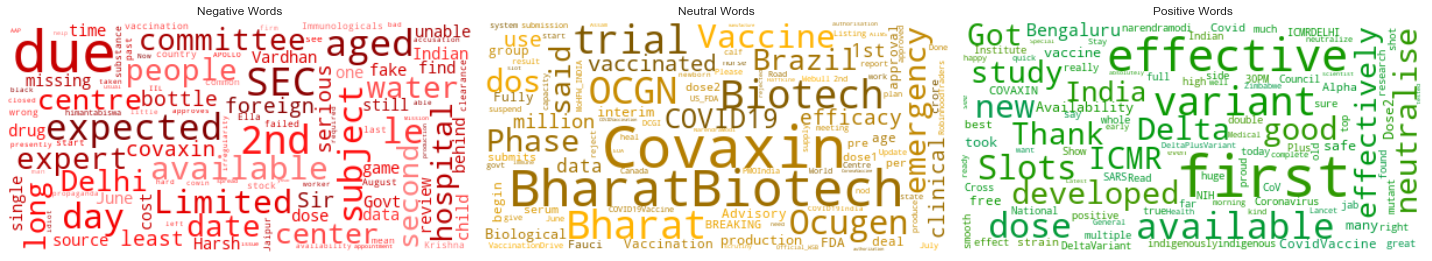

In [96]:
wordcloud_df = cc_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("covaxin_sentiment_wordclouds.png", bbox_inches="tight")